In [1]:
import tensorflow as tf 
import numpy as np
import csv 
import matplotlib.pyplot as plt 
from urllib import request
from sklearn import decomposition
from sklearn import datasets


def curado(v,k):
  total = np.zeros(np.size(v))
  false_array = np.zeros(np.size(v))
  c = 0
  for i in np.arange(k+1):
    mask = np.where(v == i, True, False)
    if(np.array_equal(mask, false_array)):#condicion de que todo el array es false
      continue
    filtrado = mask*c
    total = total+filtrado
    c = c+1
  return total, c 

example_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv" 
f = request.urlopen(example_url) 
dataset = np.loadtxt(f, dtype=float, delimiter=",", skiprows = 1)

quimicos = np.array(dataset[:,:9]) #tomo las primeras 9 columnas
resultado = np.array(dataset[:,9]) #la ultima columna me determina el resultado
largo = np.size(resultado) 
#curacion de datos
resultado, k = curado(resultado, 7)

#normalizacion de datos 
desvio_std = np.std(quimicos,axis=0) #poner el axis si o si para que calcule la media de forma adecuada.
media = np.mean(quimicos,axis=0)
quimicos_norm = (quimicos-media)/desvio_std

Text(0.5, 1.0, 'Dimension vs ECM')

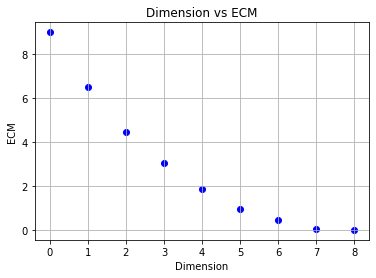

In [2]:
#busco la dimension que reduce el ecm!
for x in np.arange(np.shape(quimicos_norm)[1]):
  pca = decomposition.PCA(n_components=x)
  pca.fit(quimicos_norm)
  U = pca.transform(quimicos_norm)
  Xh = pca.inverse_transform(U)
  #print('ECM',np.sum((quimicos_norm-Xh)**2)/largo)
  plt.scatter(x, np.sum((quimicos_norm-Xh)**2)/largo, color ='blue')
plt.grid()
plt.xlabel('Dimension')
plt.ylabel('ECM')
plt.title('Dimension vs ECM')

Text(0.5, 1.0, 'Dimesion vs Energia')

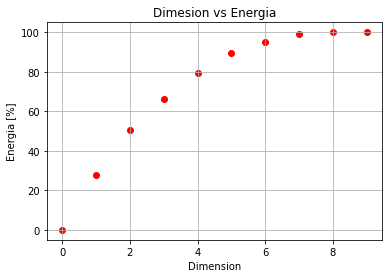

In [3]:
#porcentaje de energia en funcion de las dimensiones
for x in np.arange(np.shape(quimicos_norm)[1]+1):
  pca = decomposition.PCA(n_components=x)
  pca.fit(quimicos_norm)
  U = pca.transform(quimicos_norm)
  Xh = pca.inverse_transform(U)
  #print('ECM',np.sum((quimicos_norm-Xh)**2)/largo)
  plt.scatter(x,100*np.sum(pca.explained_variance_ratio_), color = 'red')
plt.grid()
plt.ylabel("Energia [%]")
plt.xlabel("Dimension")
plt.title("Dimesion vs Energia")



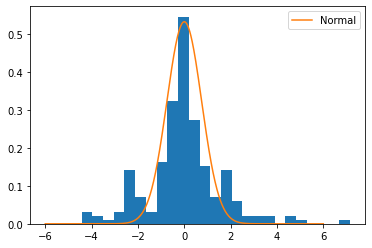

In [20]:
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import cauchy
x = 1
pca = decomposition.PCA(n_components=x)
pca.fit(quimicos_norm)
U = pca.transform(quimicos_norm)
plt.hist(U, 25, density=True)
y = np.linspace(-6,6, 1000)
plt.plot(y, norm.pdf(y,0, 0.75), label = 'Normal')
#plt.plot(y, t.pdf(y, 200), label = 't-student')
#plt.plot(y,cauchy.pdf(y,1e-5), label = 'cauchy')
plt.legend()

In [27]:
#simulo nuevos vidrios (con valores normalizados)
simulated_glasses = []
sintetic_data = np.random.normal(loc=0.0, scale=0.75, size = 5)
for x in np.arange(sintetic_data.size):
    simulated_glasses.append(pca.inverse_transform(sintetic_data[x]))
print(simulated_glasses)

[array([[-0.52143297,  0.24688365, -0.10605184,  0.41003742,  0.21887002,
         0.20979113, -0.47086507,  0.23947073, -0.17774773]]), array([[ 0.94218701, -0.4460987 ,  0.19162706, -0.7409043 , -0.39548034,
        -0.37907552,  0.85081491, -0.43270415,  0.3211757 ]]), array([[ 0.34628759, -0.16395731,  0.07042983, -0.27230896, -0.14535324,
        -0.13932388,  0.31270506, -0.15903433,  0.11804362]]), array([[-0.05215068,  0.02469186, -0.01060669,  0.04100955,  0.0218901 ,
         0.02098208, -0.04709318,  0.02395047, -0.01777729]]), array([[-0.61492888,  0.2911513 , -0.12506754,  0.48355947,  0.25811467,
         0.24740788, -0.55529386,  0.2824092 , -0.20961891]])]
